# Simple Linear Regression

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

lung_disease_df = pd.read_csv("../data/LungDisease.csv")

import pandas as pd
import statsmodels.api as sm

# Example dataset
data = {
    "PEFR": [500, 450, 400, 420, 430],  # Replace with your data
    "Exposure": [1, 0, 1, 0, 1]          # Replace with your data
}
lung = pd.DataFrame(data)

# Define the dependent (Y) and independent (X) variables
X = lung["Exposure"]  # Predictor variable
Y = lung["PEFR"]      # Response variable

# Add a constant (intercept) to the independent variable
X = sm.add_constant(X)

# Perform linear regression
model = sm.OLS(Y, X).fit()

# Display the results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   PEFR   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.314
Method:                 Least Squares   F-statistic:                   0.04373
Date:                Wed, 01 Jan 2025   Prob (F-statistic):              0.848
Time:                        10:46:51   Log-Likelihood:                -24.699
No. Observations:                   5   AIC:                             53.40
Df Residuals:                       3   BIC:                             52.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        435.0000     30.867     14.093      0.0

/home/joshua/.local/lib/python3.10/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


# See Predictions and Residuals (errors)

In [3]:
# Assuming you already have the model from previous steps
fitted = model.predict(X)  # Fitted values (predicted values)
residuals = model.resid    # Residuals (observed - fitted)

# Display the results
print("Fitted Values:\n", fitted)
print("Residuals:\n", residuals)


Fitted Values:
 0    443.333333
1    435.000000
2    443.333333
3    435.000000
4    443.333333
dtype: float64
Residuals:
 0    56.666667
1    15.000000
2   -43.333333
3   -15.000000
4   -13.333333
dtype: float64


### (the below data is corrupted)

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

house_sales_df = pd.read_csv("../data/house_sales.csv")

# house_sales_df[["AdjSalePrice", "SqFtTotLiving", "SqFtLot", "Bathrooms", "Bedrooms", "BldgGrade"]]
house_sales_df

,"DocumentDate\t""SalePrice""\t""PropertyID""\t""PropertyType""\t""ym""\t""zhvi_px""\t""zhvi_idx""\t""AdjSalePrice""\t""NbrLivingUnits""\t""SqFtLot""\t""SqFtTotLiving""\t""SqFtFinBasement""\t""Bathrooms""\t""Bedrooms""\t""BldgGrade""\t""YrBuilt""\t""YrRenovated""\t""TrafficNoise""\t""LandVal""\t""ImpsVal""\t""ZipCode""\t""NewConstruction"""
0,"1\t""2014-09-16""\t280000\t1000102\t""Multiplex""\..."
1,"2\t""2006-06-16""\t1000000\t1200013\t""Single Fam..."
2,"3\t""2007-01-29""\t745000\t1200019\t""Single Fami..."
3,"4\t""2008-02-25""\t425000\t2800016\t""Single Fami..."
4,"5\t""2013-03-29""\t240000\t2800024\t""Single Fami..."
...,...
22682,"27057\t""2011-04-08""\t325000\t9842300710\t""Sing..."
22683,"27058\t""2007-09-28""\t1580000\t9845500010\t""Sin..."
22684,"27061\t""2012-07-09""\t165000\t9899200010\t""Sing..."
22685,"27062\t""2006-05-26""\t315000\t9900000355\t""Sing..."


# Multiple Linear Regression

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

house_df = pd.read_csv("../data/Housing.csv")

house_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [18]:
y = house_df['price']
X = house_df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]

main_model = LinearRegression()
main_model.fit(X, y)

print("Coefficients:", main_model.coef_)
print("Intercept:", main_model.intercept_)

Coefficients: [3.31115495e+02 1.67809788e+05 1.13374016e+06 5.47939810e+05
 3.77596289e+05]
Intercept: -145734.4894558806


# Cross-validation + MSE + R^2

In [19]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error, r2_score

mse = []
r2 = []

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train and evaluate your model here
    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    # Evaluation metrics
    mse.append(mean_squared_error(y_pred, y_test))
    r2.append(r2_score(y_pred, y_test))

print("Average MSE:", np.mean(mse))
print("Average R^2:", np.mean(r2))

Average MSE: 1561821596385.868
Average R^2: 0.14116524716221837


/home/joshua/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


# Minimize AIC for features and RSS combination

In [20]:
import itertools
# Function to calculate AIC
def calculate_aic(model, X, y):
    model.fit(X, y)
    y_pred = model.predict(X)
    rss = np.sum((y - y_pred)**2)
    n = len(y)
    log_likelihood = -n / 2 * (np.log(2 * np.pi * rss / n) + 1)
    k = X.shape[1] + 1  # Number of parameters
    aic = 2 * k - 2 * log_likelihood
    return aic

# Test all combinations of features
min_aic = float('inf')
best_features = None
for i in range(1, X.shape[1] + 1):
    for combo in itertools.combinations(X.columns, i):
        aic = calculate_aic(LinearRegression(), X[list(combo)], y)
        print(f"Features: {combo}, AIC: {aic}")
        if aic < min_aic:
            min_aic = aic
            best_features = combo

print("Best Features:", best_features)
print("Minimum AIC:", min_aic)

Features: ('area',), AIC: 17106.494317543165
Features: ('bedrooms',), AIC: 17212.4682625141
Features: ('bathrooms',), AIC: 17121.16075291238
Features: ('stories',), AIC: 17184.91293093218
Features: ('parking',), AIC: 17203.940200365516
Features: ('area', 'bedrooms'), AIC: 17040.841848070762
Features: ('area', 'bathrooms'), AIC: 16952.099311166417
Features: ('area', 'stories'), AIC: 16987.258490375774
Features: ('area', 'parking'), AIC: 17074.151600855657
Features: ('bedrooms', 'bathrooms'), AIC: 17096.634904455266
Features: ('bedrooms', 'stories'), AIC: 17155.94555805673
Features: ('bedrooms', 'parking'), AIC: 17138.003594614172
Features: ('bathrooms', 'stories'), AIC: 17067.55823955242
Features: ('bathrooms', 'parking'), AIC: 17053.067795421393
Features: ('stories', 'parking'), AIC: 17090.318377057436
Features: ('area', 'bedrooms', 'bathrooms'), AIC: 16931.21315008023
Features: ('area', 'bedrooms', 'stories'), AIC: 16967.469837223234
Features: ('area', 'bedrooms', 'parking'), AIC: 170

# Dealing with categorical variables

In [ ]:
# There are 3 categories (furnshied, semi-furnished, and unfurnished)
df_dummies = pd.get_dummies(house_df, columns=['furnishingstatus'], drop_first=True)
df_dummies.head() # There are only 2 more columns due to the degrees of freedom = n-1

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,False,False
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,False,False
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,True,False
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,False,False
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,False,False


# High Influence Plot

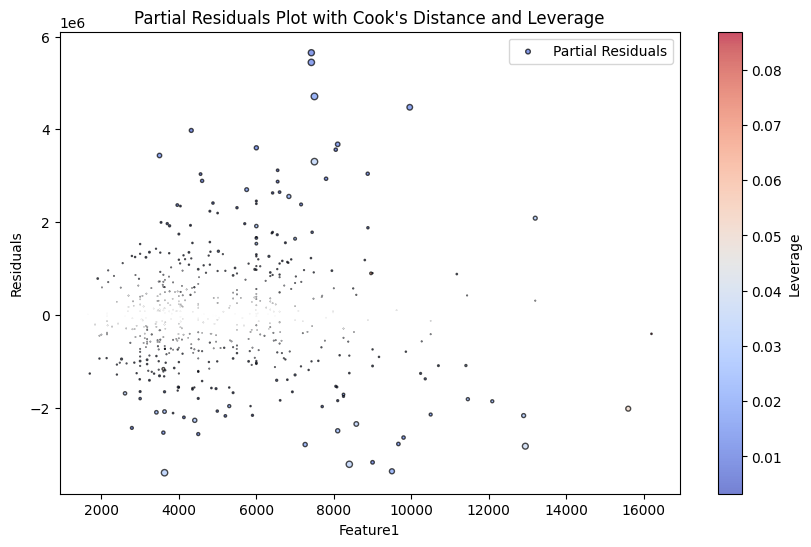

In [32]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Prepare the design matrix (X) and target vector (y)
y = house_df['price']
X = house_df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
X = sm.add_constant(X)  # Add constant (intercept) to the model

# Fit a linear regression model
model = sm.OLS(y, X).fit()

# Get the residuals
residuals = model.resid

# Calculate hat values (leverage)
hat_values = model.get_influence().hat_matrix_diag

# Calculate Cook's distance
influence = model.get_influence()
cooks_d = influence.cooks_distance[0]

# Plot Partial Residuals with the desired enhancements
plt.figure(figsize=(10, 6))

# Scatter plot: x-axis is Feature1, y-axis is partial residuals for Feature1
# Size of points represents Cook's distance, color represents leverage
plt.scatter(house_df['area'], residuals, 
            s=cooks_d * 500,   # Scale Cook's distance for better visibility
            c=hat_values,      # Leverage: color the points based on leverage
            cmap='coolwarm',   # Color map for leverage
            alpha=0.7,         # Transparency for better visualization
            edgecolors="k",    # Edge color for better clarity
            label="Partial Residuals")

# Plot labels and title
plt.xlabel('Feature1')
plt.ylabel('Residuals')
plt.title('Partial Residuals Plot with Cook\'s Distance and Leverage')
plt.colorbar(label="Leverage")  # Add a color bar to show the leverage scale
plt.legend()
plt.show()


# Partial Residuals Plot
(cooked)

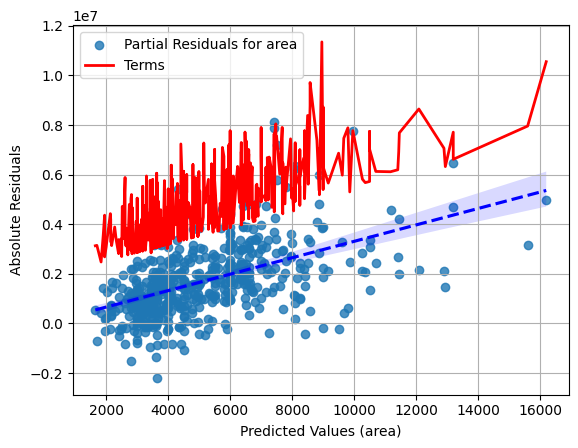

In [65]:
import seaborn as sns

# Get the predicted values (fitted values)
predicted_values = model.fittedvalues

# Get the residuals
residuals = model.resid

pred = model.predict(X)

partial_residuals = residuals + model.params["area"] * X["area"]

# Sort the data by the 'area' feature for proper plotting order
sorted_idx = np.argsort(X["area"])
sorted_area = X["area"].iloc[sorted_idx]
sorted_pred = pred[sorted_idx]
sorted_partial_residuals = partial_residuals.iloc[sorted_idx]

sns.regplot(x=sorted_area, y=sorted_partial_residuals, scatter=True, line_kws={'linestyle': '--', 'color': 'blue'}, label=f'Partial Residuals for {"area"}')

plt.plot(sorted_area, sorted_pred, color='red', label='Terms', linestyle='-', linewidth=2)

plt.xlabel('Predicted Values (area)')
plt.ylabel('Absolute Residuals')
plt.legend()
plt.grid()
plt.show()

# Plot the residuals on the histogram

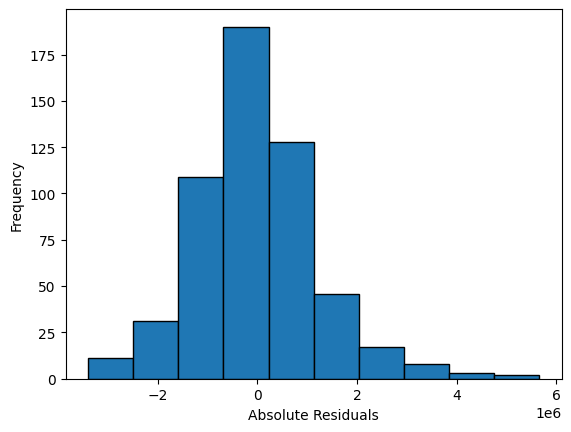

In [46]:
plt.hist(residuals, edgecolor='black')
plt.xlabel('Absolute Residuals')
plt.ylabel('Frequency')
plt.show()